## Vehicle Detection

In [62]:
'''
Functions imported from Lecture 
'''

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn
import pdb
from skimage.feature import hog

# Define a function to return HOG features and visualization
def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=2, vis=False, feature_vec=True):
    if vis:
        features, hog_image = hog(
            img,
            orientations=orient,
            pixels_per_cell=(pix_per_cell, pix_per_cell),
            cells_per_block=(cell_per_block, cell_per_block),
            transform_sqrt=True,
            visualise=vis,
            feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(
            img,
            orientations=orient,
            pixels_per_cell=(pix_per_cell, pix_per_cell),
            cells_per_block=(cell_per_block, cell_per_block),
            transform_sqrt=True,
            visualise=vis,
            feature_vector=feature_vec)
        return features

# Define a function to compute binned color features
def bin_spatial(img, size=(16, 16)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel()
    # Return the feature vector
    return features


# Define a function to compute color histogram features
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:, :, 0], bins=nbins)
    channel2_hist = np.histogram(img[:, :, 1], bins=nbins)
    channel3_hist = np.histogram(img[:, :, 2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

def single_img_features(img,
                        hog_img=None,
                        color_space='YCrCb',
                        spatial_size=(32, 32),
                        hist_bins=32,
                        orient=9,
                        pix_per_cell=8,
                        cell_per_block=2,
                        hog_channel='ALL',
                        spatial_feat=True,
                        hist_feat=True,
                        hog_feat=True, DEBUG= True):
    
    # 1) Define an empty list to receive features
    img_features = []

    # 2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    else:
        feature_image = np.copy(img)

        # 3) Compute spatial features if flag is set
    if spatial_feat:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # 4) Append features to list
        img_features.append(spatial_features)
    # 5) Compute histogram features if flag is set
    if hist_feat:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        # 6) Append features to list
        img_features.append(hist_features)
    # 7) Compute HOG features if flag is set
    if hog_feat:
        if hog_img is not None:
            hog_features = []
            for channel in range(hog_img.shape[2]):
                hog_features.extend(hog_img[..., channel].ravel())
        elif hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[..., channel],
                                    orient, pix_per_cell, cell_per_block,
                                    vis=False, feature_vec=True))
        else:
            hog_features = get_hog_features(feature_image[..., hog_channel],
                                            orient,
                                            pix_per_cell,
                                            cell_per_block,
                                            vis=False,
                                            feature_vec=True)
        if DEBUG:
            # Plot the examples
            fig = plt.figure()
            plt.subplot(421)
            plt.imshow(img)
            plt.title('Original Car Image')
            plt.subplot(422)
            plt.imshow(feature_image)
            plt.title('YCbCr space Image')
            plt.subplot(423)
            plt.imshow(img)
            plt.title('Original Car Image')
            plt.subplot(424)
            plt.plot(spatial_features)
            plt.title('Spatial Features')
            plt.subplot(425)
            plt.imshow(img)
            plt.title('Original Car Image')
            plt.subplot(426)
            plt.plot(hist_features)
            plt.title('color Histogram Features')
            plt.subplot(427)
            plt.imshow(img)
            plt.title('Original Car Image')
            plt.subplot(428)
            plt.imshow(hog_features)
            plt.title('HOG Features')

            # 8) Append features to list
        img_features.append(hog_features)

    # 9) Return concatenated array of features
    return np.concatenate(img_features)


def extract_features(imgs):
    features = []
    for file in imgs:
        image = cv2.imread(file)
        image = image.astype(np.float32) / 255
        features.append(single_img_features(image))
    return features

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy


### Feature Analysis

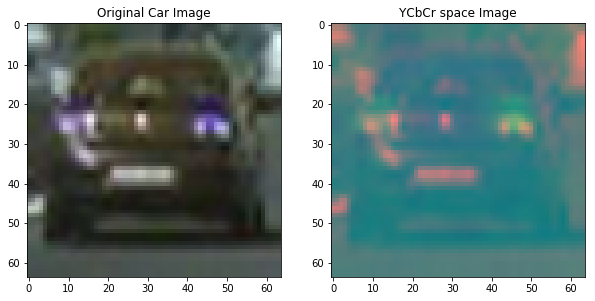

In [91]:
file = 'data/vehicles/GTI_Far/image0237.png'
image = cv2.imread(file)
image = image.astype(np.float32) / 255
feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Car Image')
plt.subplot(122)
plt.imshow(feature_image)
plt.title('YCbCr space Image')

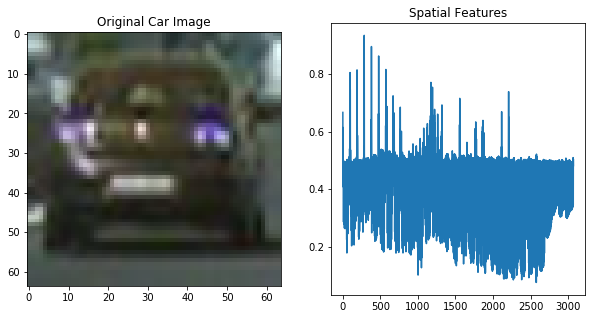

In [92]:
spatial_features = bin_spatial(feature_image, size=(32, 32))
fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Car Image')
plt.subplot(122)
plt.plot(spatial_features)
plt.title('Spatial Features')

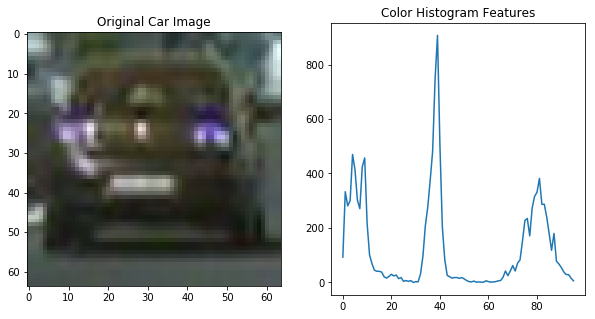

In [93]:
hist_features = color_hist(feature_image, nbins=32)
fig = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Car Image')
plt.subplot(122)
plt.plot(hist_features)
plt.title('Color Histogram Features')

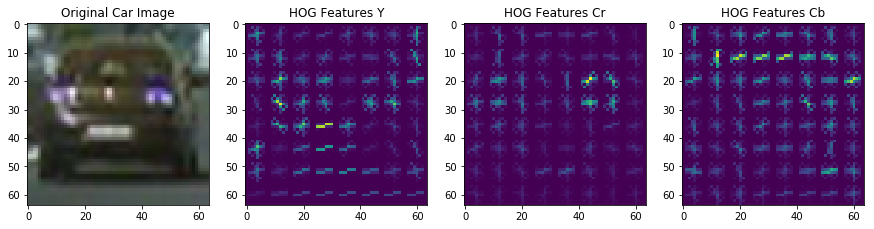

In [94]:
features, hog_image1 = hog(feature_image[...,0],9,(8, 8),(2, 2),transform_sqrt=False,visualise=True,feature_vector=False)
features, hog_image2 = hog(feature_image[...,1],9,(8, 8),(2, 2),transform_sqrt=False,visualise=True,feature_vector=False)
features, hog_image3 = hog(feature_image[...,2],9,(8, 8),(2, 2),transform_sqrt=False,visualise=True,feature_vector=False)
fig = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(141)
plt.imshow(image)
plt.title('Original Car Image')
plt.subplot(142)
plt.imshow(hog_image1)
plt.title('HOG Features Y')
plt.subplot(143)
plt.imshow(hog_image2)
plt.title('HOG Features Cr')
plt.subplot(144)
plt.imshow(hog_image3)
plt.title('HOG Features Cb')

### Build Classifier Pipeline

In [53]:
import numpy as np
import glob
import time
import os
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score


def load_data():
    cwd = 'data/'
    vehicle_folders = [
        'vehicles/GTI_Far/',
        'vehicles/GTI_Left/',
        'vehicles/GTI_MiddleClose/',
        'vehicles/GTI_Right/',
        'vehicles/KITTI_extracted/'
      ]
    non_vehicle_folders = [
        'non-vehicles/Extras/',
        'non-vehicles/GTI/'
      ]

    data = {'features': [], 'labels': [], 'v_cnt': 0, 'nv_cnt': 0}

    for folder in vehicle_folders:
        for im_path in glob.glob(cwd + folder + '*.png'):
            data['features'].append(im_path)
            data['labels'].append(1)
            data['v_cnt'] += 1

    for folder in non_vehicle_folders:
        for im_path in glob.glob(cwd + folder + '*.png'):
            data['features'].append(im_path)
            data['labels'].append(0)
            data['nv_cnt'] += 1


    data['features'] = extract_features(data['features'])
#     temp = data['features']
#     temp = np.array(temp)
#     print(temp)
#     print('shape of feature extracted image', temp.shape)
    data['scaler'] = StandardScaler().fit(data['features'])
    data['features'] = data['scaler'].transform(data['features'])
    data['labels'] = np.array(data['labels'])
    data['labels'] = np.array(data['labels'])
#     print('data count for each class: ', data['v_cnt'], ' ', data['nv_cnt'])
#     with open('data/data.p', 'wb') as f:
#         pickle.dump(data, f)
    return data


def shuffle_and_split(data):
    """
    Expects `data` to be in the form of `load_data`s return dict.
    """
    features, labels = shuffle(data['features'], data['labels'])
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=1)
    return X_train, X_test, y_train, y_test


def train():
    """
    Loads and splits the training data, trains a linear SVM on it, evaluates it's perfromance, and returns the
    model along with the associated scaler for the features.
    """
    print('Loading the data...')
    t = time.clock()

    data = load_data()

    X_scaler = data['scaler']

    t = abs(time.clock() - t)
    print('Loaded %d car images and %d non-car images in %d seconds.'
          % (data['v_cnt'], data['nv_cnt'], t))

#     X_train, X_test, y_train, y_test = shuffle_and_split(data)
    features, labels = shuffle(data['features'], data['labels'])
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=1)
    print('Split the data into %d training and %d testing examples.' % (y_train.shape[0], y_test.shape[0]))
    del data

    model = LinearSVC()
    print('Training the model...')

    t = time.clock()
    model.fit(X_train, y_train)
    t = abs(time.clock() - t)

    print('Model accuracy: %0.4f' % model.score(X_test, y_test))
    
    # Save Model 
    with open('data/model.p', 'wb') as f:
        pickle.dump([model, X_scaler], f)

    # 10 Fold cross Validation
    scores = cross_val_score(model, features, labels, cv=10)
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
    return model, X_scaler

model, X_scaler = train()

Loading the data...
data count for each class:  8792   8968
Loaded 8792 car images and 8968 non-car images in 62 seconds.
Split the data into 14208 training and 3552 testing examples.
Training the model...
Model trained in 16 seconds.
Model accuracy: 0.9916
Accuracy: 0.99 (+/- 0.00)


### Vehicle search using sliding window

In [52]:
import numpy as np
import glob
import time
import os
import pickle
import pdb
from skimage.feature import hog
from scipy.ndimage.measurements import label

## paramters for vehicle shearaching

# model from classifier
model=model 
# scaling paramter for image 
X_scaler
# image frame used for searching vehicle in the image
im_size=(64, 64)
# area of image in which vehicle is searched
ystart=400
ystop=650
# image resizing factor
scale=1
# HOG Parameters
orient=9
pix_per_cell=8
cell_per_block=2
# Spacial Image Parameters
spatial_size=(32, 32)
# Color Histogram Parameters
hist_bins=32
# Temporal frame
frame_memory=5
threshold=3
frame_buffer=[]

def find_cars(im, DEBUG = False):
    img = im.astype(np.float32) / 255
    heatmap = np.zeros_like(img)

    img_tosearch = img[ystart:ystop, ...]
    ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        h, w, ch = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (w // scale, h // scale))

    ch1 = ctrans_tosearch[:, :, 0]
    ch2 = ctrans_tosearch[:, :, 1]
    ch3 = ctrans_tosearch[:, :, 2]
    if DEBUG:
        print('channel 1: ', ch1.shape[1])
        print('channe2 1: ', ch2.shape[0])
        print('channe3 1: ', ch3.shape[0])
    # Define blocks and steps as above
    if DEBUG:
        print('output values: ',  (ch1.shape[1] // pix_per_cell) )
    nxblocks = (ch1.shape[1] // pix_per_cell) - 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - 1

    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    if DEBUG:
        print('number of steps : ',  nxsteps, ' and type: ', type(nxsteps) )
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb * cells_per_step
            xpos = xb * cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos * pix_per_cell
            ytop = ypos * pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop + window, xleft:xleft + window], im_size)

            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack(( spatial_features, hist_features, hog_features))).reshape(1, -1)
            # test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))
            test_prediction = model.predict(test_features)
            if 0:
                print('test prediction: ', test_prediction)
                
            if test_prediction == 1:
                xbox_left = np.int(xleft * scale)
                ytop_draw = np.int(ytop * scale)
                win_draw = np.int(window * scale)
                top_left = (xbox_left, ytop_draw + ystart)
                bottom_right = (xbox_left + win_draw, ytop_draw + win_draw + ystart)
                if DEBUG:
                    print('area of prediction: ', xbox_left, ytop_draw, win_draw, top_left, bottom_right )
                add_heat(heatmap, (top_left, bottom_right))

    add_to_buffer(heatmap)
    avg_heatmap = get_heatmap_from_buffer()
    labels = label(avg_heatmap)
    return draw_labeled_bounding_boxes(im, labels)

def add_to_buffer(heat_map):
    """
    Adds a given heatmap to the heatmap buffer. If the buffer is currently the maximum length, remove the
    oldest element and then add the given heatmap.
    """
    if len(frame_buffer) == frame_memory:
        frame_buffer.pop(0)
    frame_buffer.append(heat_map)
    return

def get_heatmap_from_buffer():
    """
    Gets an averaged heatmap from every heatmap currently in the buffer.
    """
    heatmap_sum = np.zeros_like(frame_buffer[0])
    for heatmap in frame_buffer:
        heatmap_sum = np.add(heatmap_sum, heatmap)
    heatmap_sum[heatmap_sum < threshold] = 0
    return heatmap_sum

# @staticmethod
def add_heat(heatmap, window):
    """
    Adds `heat`, A.K.A. 1, to every pixel within a given window in a heatmap.
    :param heatmap: Heatmap to add heat to
    :param window: List containing the upper left and bottom right corners of the ROI to add heat to.
    """
    xstart, ystart = window[0]
    xend, yend = window[1]
    heatmap[ystart:yend, xstart:xend, ...] += 1
    return heatmap

# @staticmethod
def draw_labeled_bounding_boxes(im, labels):
    """
    Given a class labeled image mask, find the tightest bounding box around each class, draw these boxes onto the
    original image, and return the annotated image.
    :param im: Image to draw on
    :param labels: Pixel-wise class labeled mask of the original image.
    """
    cpy = np.copy(im)
    for car_number in range(1, labels[1]+1):
        nonzero = (labels[0] == car_number).nonzero()
        nonzero_y = np.array(nonzero[0])
        nonzero_x = np.array(nonzero[1])

        bbox = ((np.min(nonzero_x), np.min(nonzero_y)), (np.max(nonzero_x), np.max(nonzero_y)))
        cv2.rectangle(cpy, bbox[0], bbox[1], (0, 0, 255), 6)
    return cpy



[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4



100%|█████████▉| 1260/1261 [14:40<00:00,  1.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 



In [ ]:
from moviepy.editor import VideoFileClip
infile = 'project_video.mp4'
outfile = 'project_video_output.mp4'




 # Load and process the video
original = VideoFileClip(infile)
processed = original.fl_image(find_cars)
processed.write_videofile(outfile, audio=False)